# Problem Statement

Welcome to your first week of work at the Disease And Treatment Agency, division of Societal Cures In Epidemiology and New Creative Engineering (DATA-SCIENCE). Time to get to work!

Due to the recent epidemic of West Nile Virus in the Windy City, we've had the Department of Public Health set up a surveillance and control system. We're hoping it will let us learn something from the mosquito population as we collect data over time. Pesticides are a necessary evil in the fight for public health and safety, not to mention expensive! We need to derive an effective plan to deploy pesticides throughout the city, and that is exactly where you come in!

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Initialise Helper functions

In [2]:
def clean_data(row):
    if ('M' in row) | ('T' in row):
        row = np.nan  # to impute
    return row

In [3]:
def adjust_columns(df):
    df.columns = df.columns.str.lower()
    
    df['date'] = pd.to_datetime(df['date'])
    df['day'] = df['date'].dt.day
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    return df

## Import data

In [4]:
train = pd.read_csv('./assets/train.csv')
test = pd.read_csv('./assets/test.csv')
weather = pd.read_csv('./assets/weather.csv')
spray = pd.read_csv('./assets/spray.csv')

Lower all column headers

In [5]:
train = adjust_columns(train)
test = adjust_columns(test)
weather = adjust_columns(weather)
spray = adjust_columns(spray)

# Data Cleaning

## Data Cleaning for Train

In [6]:
train['month'].value_counts(normalize=True)

8     0.357034
7     0.248049
9     0.211117
6     0.149534
10    0.026271
5     0.007995
Name: month, dtype: float64

In [7]:
train['addressaccuracy'].value_counts(normalize=True)

8    0.440510
9    0.378831
5    0.171997
3    0.008662
Name: addressaccuracy, dtype: float64

In [8]:
train.duplicated().sum()

813

In [9]:
train.columns

Index(['date', 'address', 'species', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy',
       'nummosquitos', 'wnvpresent', 'day', 'month', 'year'],
      dtype='object')

In [10]:
train_clean = train.drop_duplicates(subset=['date', 'address', 'species', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy',
       'nummosquitos', 'wnvpresent'], keep='first')

When number of mosquitos exceed 50, they are split into another record. We will drop these duplicated record.

**Note:** Frequency might be a factor later. To revise if needed

In [11]:
train_clean = train_clean[train_clean['nummosquitos'] != 50]

In [12]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9381 entries, 0 to 10505
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    9381 non-null   datetime64[ns]
 1   address                 9381 non-null   object        
 2   species                 9381 non-null   object        
 3   block                   9381 non-null   int64         
 4   street                  9381 non-null   object        
 5   trap                    9381 non-null   object        
 6   addressnumberandstreet  9381 non-null   object        
 7   latitude                9381 non-null   float64       
 8   longitude               9381 non-null   float64       
 9   addressaccuracy         9381 non-null   int64         
 10  nummosquitos            9381 non-null   int64         
 11  wnvpresent              9381 non-null   int64         
 12  day                     9381 non-null   int64  

## Data Cleaning for Spray

In [13]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       14835 non-null  datetime64[ns]
 1   time       14251 non-null  object        
 2   latitude   14835 non-null  float64       
 3   longitude  14835 non-null  float64       
 4   day        14835 non-null  int64         
 5   month      14835 non-null  int64         
 6   year       14835 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 811.4+ KB


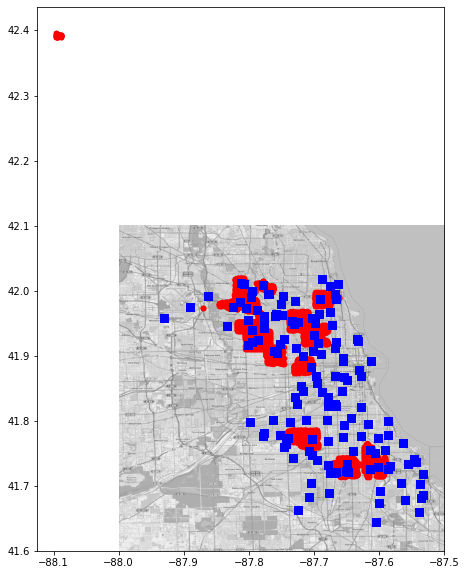

In [14]:
train_longs = train['longitude']
train_lats = train['latitude']

spray_longs = spray['longitude']
spray_lats = spray['latitude']

plt.figure(figsize=(8,10))
origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
upperRight = [42.1, -87.5]          # lat/long of upper right corner

mapdata = np.loadtxt("./assets/mapdata_copyright_openstreetmap_contributors.txt")

intersection = [41.909614, -87.746134]  # co-ordinates of intersection of IL64 / IL50 according to Google Earth


# generate plot
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
plt.scatter(x=spray_longs, y=spray_lats, c='r', s=20)
plt.scatter(x=train_longs, y=train_lats, c='b', s=60, marker='s')

#plt.show()
plt.savefig('map.png')

In [15]:
spray['longitude'].describe()

count    14835.000000
mean       -87.736690
std          0.067292
min        -88.096468
25%        -87.794225
50%        -87.727853
75%        -87.694108
max        -87.586727
Name: longitude, dtype: float64

In [16]:
train['longitude'].describe()

count    10506.000000
mean       -87.699908
std          0.096514
min        -87.930995
25%        -87.760070
50%        -87.694991
75%        -87.627796
max        -87.531635
Name: longitude, dtype: float64

<AxesSubplot:xlabel='longitude'>

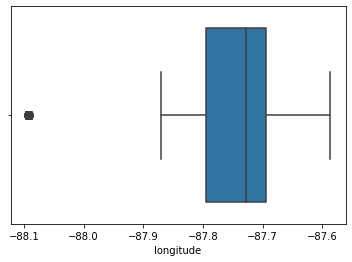

In [17]:
sns.boxplot(data=spray, x='longitude')

We see that there are outliers of longitude below -88 in our spray dataset. Which will exceed our longitude in our train dataset.

In [18]:
spray_clean = spray[spray['longitude'] > -88]

In [19]:
spray_clean.duplicated(subset=['date','time','latitude','longitude']).sum()

541

In [20]:
spray_clean.drop_duplicates(subset=['date','time','latitude','longitude'], inplace=True)

<ipython-input-20-e955cfbf6ae5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spray_clean.drop_duplicates(subset=['date','time','latitude','longitude'], inplace=True)


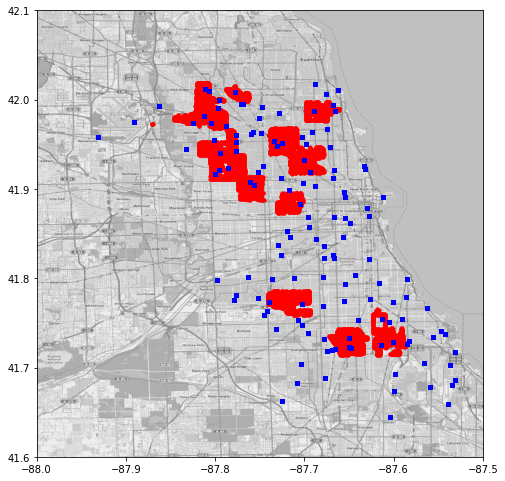

In [21]:
train_longs = train['longitude']
train_lats = train['latitude']

spray_longs = spray_clean['longitude']
spray_lats = spray_clean['latitude']

plt.figure(figsize=(8,10))
origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
upperRight = [42.1, -87.5]          # lat/long of upper right corner

mapdata = np.loadtxt("./assets/mapdata_copyright_openstreetmap_contributors.txt")

intersection = [41.909614, -87.746134]  # co-ordinates of intersection of IL64 / IL50 according to Google Earth


# generate plot
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
plt.scatter(x=spray_longs, y=spray_lats, c='r', s=10)
plt.scatter(x=train_longs, y=train_lats, c='b', s=15, marker='s')

#plt.show()
# plt.savefig('map.png')

## Data Cleaning for Weather

In [22]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   station      2944 non-null   int64         
 1   date         2944 non-null   datetime64[ns]
 2   tmax         2944 non-null   int64         
 3   tmin         2944 non-null   int64         
 4   tavg         2944 non-null   object        
 5   depart       2944 non-null   object        
 6   dewpoint     2944 non-null   int64         
 7   wetbulb      2944 non-null   object        
 8   heat         2944 non-null   object        
 9   cool         2944 non-null   object        
 10  sunrise      2944 non-null   object        
 11  sunset       2944 non-null   object        
 12  codesum      2944 non-null   object        
 13  depth        2944 non-null   object        
 14  water1       2944 non-null   object        
 15  snowfall     2944 non-null   object        
 16  precip

In [23]:
weather['water1'].value_counts(normalize=True)

M    1.0
Name: water1, dtype: float64

In [24]:
weather = weather.drop(columns = 'water1')

In [25]:
weather['heat'].value_counts(normalize=True)

0     0.635190
4     0.029891
1     0.029212
2     0.027514
8     0.022758
3     0.022418
5     0.020720
15    0.019361
7     0.016644
12    0.016644
10    0.016304
11    0.016304
9     0.015625
13    0.015625
6     0.015285
14    0.012228
16    0.009851
20    0.009511
19    0.008152
18    0.008152
21    0.006454
17    0.005774
23    0.005095
22    0.004076
M     0.003736
24    0.002378
25    0.001698
26    0.001359
29    0.000679
27    0.000679
28    0.000679
Name: heat, dtype: float64

Tavg, heat and cool 11 'M' values are from the same record. Will drop, as it constitutes 0.003% of total dataset.

In [37]:
weather = weather[weather['tavg'] != 'M']

In [32]:
def impute_data(df, col):
    df_1 = df.loc[(df['station'] == 1) & (~df[col].str.strip().isin(['M','T'])),col].astype(float)
    df_2 = df.loc[(df['station'] == 2) & (~df[col].str.strip().isin(['M','T'])),col].astype(float)
    mean_diff = df_1.mean() - df_2.mean()
    
    idx = list(df.loc[(df[col].isin(['M','T']))].index)
    
    for i in idx:
        if df.loc[i]['station'] == 1:
            if check_value(df, col, i):
                new_val = (float(df.loc[i+2][col]) + float(df.loc[i-2][col])) / 2
                df.at[i,col] = new_val
                df.at[i+1,col] = new_val
                idx.remove(i)
                idx.remove(i+1)
            else:
                df.at[i,col] = float(df.loc[i+1][col]) + mean_diff
        else:
            df.at[i,col] = float(df.loc[i-1][col]) + mean_diff
    return df

In [33]:
def check_value(df, col, station_1_idx):
    if ((df.loc[station_1_idx][col] in ['M','T']) & (df.loc[station_1_idx+1][col] in ['M','T'])):
        return True
    else:
        return False

In [34]:
weather = impute_data(weather, 'wetbulb')
weather = impute_data(weather, 'preciptotal')
weather = impute_data(weather, 'stnpressure')
weather = impute_data(weather, 'avgspeed')

# Exploratory Data Analysis

# Modelling

# Conclusion